## Data Loading

In [61]:
import pandas as pd

# Load main datasets
orders = pd.read_csv("/home/anurag-mandlekar/Desktop/ML_Mini_project/input/olist_orders_dataset.csv")
customers = pd.read_csv("/home/anurag-mandlekar/Desktop/ML_Mini_project/input/olist_customers_dataset.csv")
order_items = pd.read_csv("/home/anurag-mandlekar/Desktop/ML_Mini_project/input/olist_order_items_dataset.csv")
payments = pd.read_csv("/home/anurag-mandlekar/Desktop/ML_Mini_project/input/olist_order_payments_dataset.csv")
reviews = pd.read_csv("/home/anurag-mandlekar/Desktop/ML_Mini_project/input/olist_order_reviews_dataset.csv")
products = pd.read_csv("/home/anurag-mandlekar/Desktop/ML_Mini_project/input/olist_products_dataset.csv")

# check first rows
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [62]:
orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

## Data Merging

In [63]:
# create base dataset
df_main = orders.copy()

In [64]:
#Aggregate payments data
payments_agg = payments.groupby("order_id")["payment_value"].sum().reset_index()

In [65]:
#Aggregate order items 
items_agg = order_items.groupby("order_id").agg({
    "price": "sum",
    "freight_value": "sum"
}).reset_index()

In [66]:
# Merge with customers
df_main = df_main.merge(customers, on="customer_id", how="left")

# Merge with payments
df_main = df_main.merge(payments_agg, on="order_id", how="left")

#Merge with order items
df_main = df_main.merge(items_agg, on="order_id", how="left")



In [67]:
# Merge reviews
reviews_selected = reviews[[
    "order_id",
    "review_score",
    "review_comment_message"
]]

df_main = df_main.merge(
    reviews_selected,
    on="order_id",
    how="left"
)

In [68]:
df_main.shape
df_main.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_value,price,freight_value,review_score,review_comment_message
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,38.71,29.99,8.72,4.0,"Não testei o produto ainda, mas ele veio corre..."
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,141.46,118.70,22.76,4.0,Muito bom o produto.
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,179.12,159.90,19.22,5.0,NaN
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,72.20,45.00,27.20,5.0,O produto foi exatamente o que eu esperava e e...
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,28.62,19.90,8.72,5.0,NaN


## Applying Feature Engineering

In [69]:
#Checking data types of timestamp columns
df_main[[
    "order_purchase_timestamp",
    "order_approved_at",
    "order_delivered_carrier_date",
    "order_delivered_customer_date",
    "order_estimated_delivery_date" 
]].dtypes

order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [70]:
# Convert timestamp columns to datetime
timestamp_cols = [
    "order_purchase_timestamp",
    "order_approved_at",
    "order_delivered_carrier_date",
    "order_delivered_customer_date",
    "order_estimated_delivery_date" 
]
for col in timestamp_cols:
    df_main[col] = pd.to_datetime(df_main[col])

In [71]:
df_main[[
    "order_purchase_timestamp",
    "order_approved_at",
    "order_delivered_carrier_date",
    "order_delivered_customer_date",
    "order_estimated_delivery_date" 
]].dtypes

order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [72]:
# Delivery Time 
df_main["delivery_days"] = (df_main["order_delivered_customer_date"] - df_main["order_purchase_timestamp"]).dt.days
df_main["delivery_days"]

0         8.0
1        13.0
2         9.0
3        13.0
4         2.0
         ... 
99987     8.0
99988    22.0
99989    24.0
99990    17.0
99991     7.0
Name: delivery_days, Length: 99992, dtype: float64

In [73]:
#Approval Time
df_main["approval_days"] = (df_main["order_approved_at"]- df_main["order_purchase_timestamp"]).dt.days
df_main["approval_days"]

0        0.0
1        1.0
2        0.0
3        0.0
4        0.0
        ... 
99987    0.0
99988    0.0
99989    0.0
99990    0.0
99991    0.0
Name: approval_days, Length: 99992, dtype: float64

In [74]:
# Delivery Delay
df_main["delivery_delay"] = (df_main["order_delivered_customer_date"]- df_main["order_estimated_delivery_date"]).dt.days
df_main["delivery_delay"]

0        -8.0
1        -6.0
2       -18.0
3       -13.0
4       -10.0
         ... 
99987   -11.0
99988    -2.0
99989    -6.0
99990   -21.0
99991   -18.0
Name: delivery_delay, Length: 99992, dtype: float64

In [75]:
#Total order cost
df_main["total_order_cost"] = df_main["price"] + df_main["freight_value"]
df_main["total_order_cost"]

0         38.71
1        141.46
2        179.12
3         72.20
4         28.62
          ...  
99987     85.08
99988    195.00
99989    271.01
99990    441.16
99991     86.86
Name: total_order_cost, Length: 99992, dtype: float64

In [76]:
#freight ration 
df_main["freight_ratio"] = df_main["freight_value"] / df_main["total_order_cost"]
df_main["freight_ratio"]

0        0.225265
1        0.160894
2        0.107302
3        0.376731
4        0.304682
           ...   
99987    0.153738
99988    0.103077
99989    0.239917
99990    0.184015
99991    0.211375
Name: freight_ratio, Length: 99992, dtype: float64

In [206]:
#Temporal Features
df_main["purchase_month"] = df_main["order_purchase_timestamp"].dt.month
df_main["purchase_dayofweek"] = df_main["order_purchase_timestamp"].dt.dayofweek

## Handling Missing Values

In [78]:
df_main.isnull().sum().sort_values(ascending=False)

review_comment_message           59015
order_delivered_customer_date     2987
delivery_days                     2987
delivery_delay                    2987
order_delivered_carrier_date      1793
freight_value                      778
price                              778
total_order_cost                   778
freight_ratio                      778
review_score                       768
approval_days                      161
order_approved_at                  161
payment_value                        1
order_id                             0
order_status                         0
order_purchase_timestamp             0
order_estimated_delivery_date        0
customer_id                          0
customer_city                        0
customer_state                       0
customer_unique_id                   0
customer_zip_code_prefix             0
purchase_month                       0
purchase_dayofweek                   0
dtype: int64

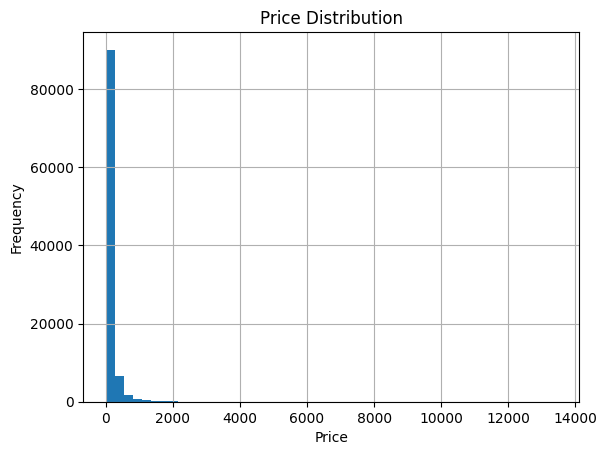

In [209]:
import matplotlib.pyplot as plt

df_main["price"].hist(bins=50)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

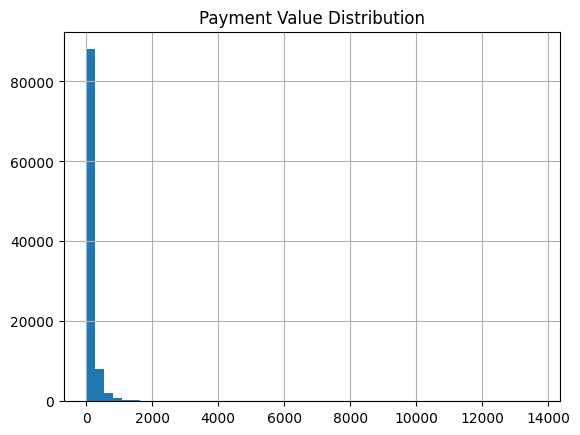

In [80]:
df_main["payment_value"].hist(bins=50)
plt.title("Payment Value Distribution")
plt.show()

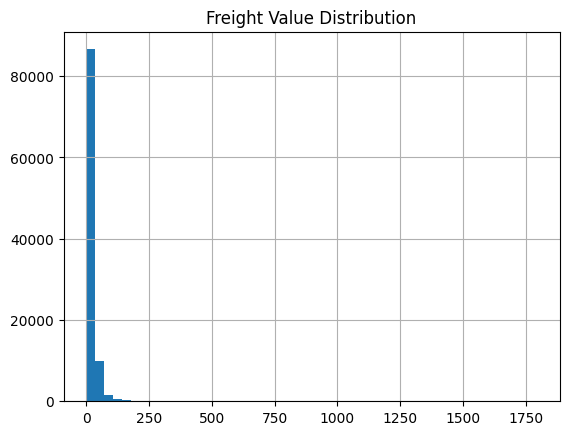

In [81]:
df_main["freight_value"].hist(bins=50)
plt.title("Freight Value Distribution")
plt.show()

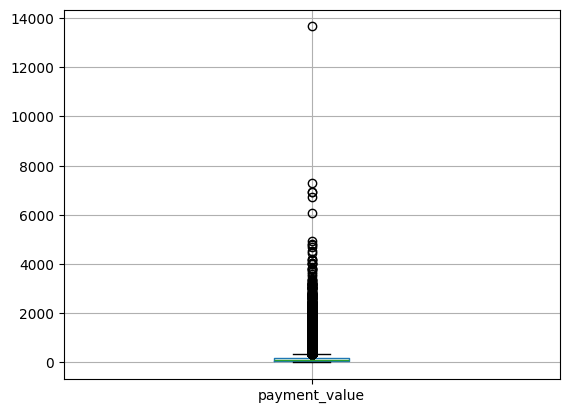

In [82]:
df_main.boxplot(column="payment_value")
plt.show()

In [83]:
df_main["payment_value"].skew()

np.float64(9.151328665172127)

In [84]:
#Filling with empty string
df_main["review_comment_message"] = df_main["review_comment_message"].fillna("")

#Filling score with 0
df_main["review_score"] = df_main["review_score"].fillna(0)

#Filled with -1 (event not completed)
time_features = ["delivery_days", "approval_days", "delivery_delay"]
df_main[time_features] = df_main[time_features].fillna(-1)

df_main["approval_days"] = df_main["approval_days"].fillna(-1)
# print("approval_time_hours" in df_main.columns)

df_main["price"] = df_main["price"].fillna(df_main["price"].median())
df_main["freight_value"] = df_main["freight_value"].fillna(df_main["freight_value"].median())
df_main["payment_value"] = df_main["payment_value"].fillna(df_main["payment_value"].median())
df_main["total_order_cost"] = df_main["total_order_cost"].fillna(df_main["total_order_cost"].median())
df_main["freight_ratio"] = df_main["freight_ratio"].fillna(0)



In [85]:
df_main.isnull().sum().sort_values(ascending=False)

order_delivered_customer_date    2987
order_delivered_carrier_date     1793
order_approved_at                 161
order_id                            0
order_purchase_timestamp            0
order_status                        0
customer_id                         0
order_estimated_delivery_date       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
payment_value                       0
price                               0
freight_value                       0
review_score                        0
review_comment_message              0
delivery_days                       0
approval_days                       0
delivery_delay                      0
total_order_cost                    0
freight_ratio                       0
purchase_month                      0
purchase_dayofweek                  0
dtype: int64

## Prepare Dataset 

Regression Dataset

In [86]:
#target variable
y_reg = df_main["payment_value"]

In [87]:
#features
regression_features = [
    "freight_value",
    "freight_ratio",
    "purchase_month",                   #spending changes seasonally
    "purchase_dayofweek",               #weekend vs weekday spending patterns
    "approval_days",                    #approval time may impact customer satisfaction and spending
    "customer_zip_code_prefix"                #logistics performance
]
X_reg = df_main[regression_features]


## Train-Test Split

In [88]:
#Regression Split
from sklearn.model_selection import train_test_split

Xr_train, Xr_test, yr_train, yr_test = train_test_split(
    X_reg,
    y_reg,
    test_size=0.2,
    random_state=42
)

## Regression Modeling

In [89]:
# Feature Scaling for Regression
from sklearn.preprocessing import StandardScaler

#tool that standerdizes features by removing the mean and scaling to unit variance
scaler = StandardScaler()

#Learn mean and std from training data, then apply to both train and test
Xr_train_scaled = scaler.fit_transform(Xr_train)
Xr_test_scaled = scaler.transform(Xr_test)


Linear Regression

In [ ]:
#Capture Linear relation between features and target
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

lin_reg.fit(Xr_train_scaled, yr_train)
#Prediction
yr_pred_lr = lin_reg.predict(Xr_test_scaled)

Ridge

In [ ]:
#Reduces overfitting 
from sklearn.linear_model import Ridge

#controls regularization strength (higher alpha = more regularization)
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(Xr_train_scaled, yr_train)

yr_pred_ridge = ridge_reg.predict(Xr_test_scaled)

Random Forest

In [ ]:
#Captures non-linear relationships and feature interactions
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)

rf_reg.fit(Xr_train, yr_train)

yr_pred_rf = rf_reg.predict(Xr_test)

Lasso Regression

In [93]:
#lasso regression
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(Xr_train_scaled, yr_train)
yr_pred_lasso = lasso_reg.predict(Xr_test_scaled)


## Evaluation Metrics


Ecaluate Linear Regression

In [94]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae_lr = mean_absolute_error(yr_test, yr_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(yr_test, yr_pred_lr))
r2_lr = r2_score(yr_test, yr_pred_lr)

In [95]:
print(f"Linear Regression - MAE: {mae_lr:.2f}, RMSE: {rmse_lr:.2f}, R²: {r2_lr:.2f}")

Linear Regression - MAE: 75.83, RMSE: 169.18, R²: 0.40


Evaluate Ridge 

In [96]:
mae_ridge = mean_absolute_error(yr_test, yr_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(yr_test, yr_pred_ridge))
r2_ridge = r2_score(yr_test, yr_pred_ridge)
print(f"Ridge Regression - MAE: {mae_ridge:.2f}, RMSE: {rmse_ridge:.2f}, R²: {r2_ridge:.2f}")

Ridge Regression - MAE: 75.83, RMSE: 169.18, R²: 0.40


Evaluate Random Forest

In [97]:
mae_rf = mean_absolute_error(yr_test, yr_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(yr_test, yr_pred_rf))
r2_rf = r2_score(yr_test, yr_pred_rf)
print(f"Random Forest Regression - MAE: {mae_rf:.2f}, RMSE: {rmse_rf:.2f}, R²: {r2_rf:.2f}")

Random Forest Regression - MAE: 3.47, RMSE: 40.28, R²: 0.97


Lasso Evaluation

In [98]:
#Evaluate Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae_lasso = mean_absolute_error(yr_test, yr_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(yr_test, yr_pred_lasso))
r2_lasso = r2_score(yr_test, yr_pred_lasso)
print(f"Lasso Regression - MAE: {mae_lasso:.2f}, RMSE: {rmse_lasso:.2f}, R²: {r2_lasso:.2f}")

Lasso Regression - MAE: 75.79, RMSE: 169.16, R²: 0.40


## Comparison Table

In [99]:
results = pd.DataFrame({
    "Model": ["Linear Regression", "Ridge Regression", "Random Forest Regression", "Lasso Regression"],
    "MAE": [mae_lr, mae_ridge, mae_rf, mae_lasso],
    "RMSE": [rmse_lr, rmse_ridge, rmse_rf, rmse_lasso],
    "R²": [r2_lr, r2_ridge, r2_rf, r2_lasso]
})
results


,Model,MAE,RMSE,R²
0,Linear Regression,75.828536,169.184544,0.400608
1,Ridge Regression,75.828055,169.184128,0.400611
2,Random Forest Regression,3.470470,40.283098,0.966019
3,Lasso Regression,75.790457,169.162153,0.400767


## Predicted vs actual Plot

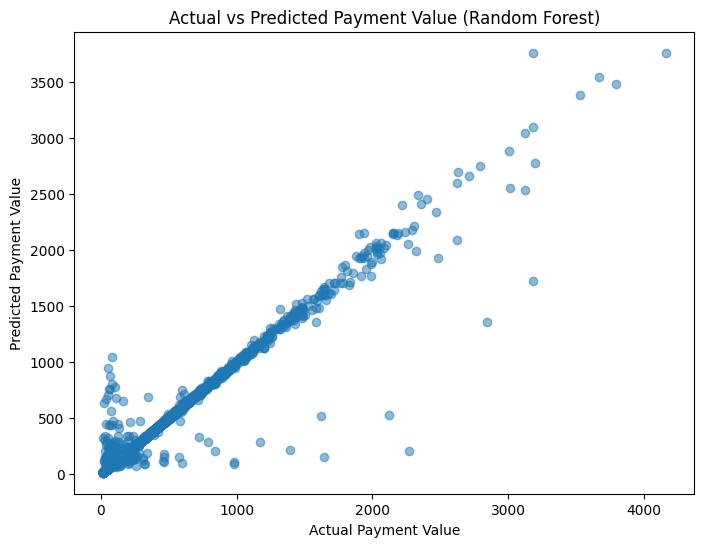

In [100]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

#scatter plot of actual vs predicted values
plt.scatter(yr_test, yr_pred_rf, alpha=0.5)

plt.xlabel("Actual Payment Value")
plt.ylabel("Predicted Payment Value")
plt.title("Actual vs Predicted Payment Value (Random Forest)")

plt.show()

## Classification

Traget variable

In [101]:
df_main["high_value_order"] = (df_main["payment_value"] 
    > df_main["payment_value"].median()
    ).astype(int)               #above median payment value is considered high value order

In [102]:
df_main["high_value_order"].value_counts(normalize=True)

high_value_order
0    0.50037
1    0.49963
Name: proportion, dtype: float64

In [103]:
#Target variable for classification
y_clf = df_main["high_value_order"]

Feature variable

In [104]:
classification_features = [
    "freight_value",                    #Higher freight may indicate longer distances or more complex logistics
    # "freight_ratio",                    #Shows logistics complexity relatiuve to order
    "approval_days",                    #may indicate processing issues
    "purchase_month",                   #spending changes seasonally
    "purchase_dayofweek",               #weekend vs weekday spending patterns       
    "customer_zip_code_prefix"          #logistics performance
]
X_clf = df_main[classification_features]

## Train-Test Split

In [105]:
from sklearn.model_selection import train_test_split

Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    X_clf,
    y_clf,
    test_size=0.2,
    random_state=42             #for reproducibility 
)

In [106]:
# Scaling Feature
from sklearn.preprocessing import StandardScaler

scaler_clf = StandardScaler()

Xc_train_scaled = scaler_clf.fit_transform(Xc_train)
Xc_test_scaled = scaler_clf.transform(Xc_test)

Logistic Regression

In [107]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)      #Kept 1000 so model converges

log_reg.fit(Xc_train_scaled, yc_train)
yc_pred_log = log_reg.predict(Xc_test_scaled)

Decision Tree

In [108]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=42)

dt_clf.fit(Xc_train, yc_train)

yc_pred_dt = dt_clf.predict(Xc_test)

Random Forest

In [109]:
from sklearn.ensemble import RandomForestClassifier

rf_clf_balanced = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

rf_clf_balanced.fit(Xc_train, yc_train)

yc_pred_rf_bal = rf_clf_balanced.predict(Xc_test)

KNN

In [110]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=5)               #checks 5 nearest neighbors to make prediction

knn_clf.fit(Xc_train_scaled, yc_train)

yc_pred_knn = knn_clf.predict(Xc_test_scaled)

## Ecaluation Mterics

In [111]:
from sklearn.metrics import (
    accuracy_score,                 #overall correctness of predictions
    precision_score,                #proportion of positive identifications that were actually correct
    recall_score,                   #proportion of actual positives that were identified correctly
    f1_score,                       #harmonic mean of precision and recall  
    confusion_matrix,               #shows true positives, false positives, true negatives, and false negatives
    roc_curve,                      #threshold performance
    roc_auc_score                   #overall classifier stregth
)

acc_rf = accuracy_score(yc_test, yc_pred_rf_bal)
prec_rf = precision_score(yc_test, yc_pred_rf_bal)
rec_rf = recall_score(yc_test, yc_pred_rf_bal)
f1_rf = f1_score(yc_test, yc_pred_rf_bal)

print("Random Forest Results")
print("Accuracy:", acc_rf)
print("Precision:", prec_rf)
print("Recall:", rec_rf)
print("F1 Score:", f1_rf)

Random Forest Results
Accuracy: 0.8308415420771038
Precision: 0.8275143820670502
Recall: 0.835386001802343
F1 Score: 0.8314315611141562


In [112]:
# Confusion Matrix
cm_rf = confusion_matrix(yc_test, yc_pred_rf_bal)
print(cm_rf)

[[8273 1739]
 [1644 8343]]


In [113]:
#Roc Curve and AUC
yc_prob_rf_bal = rf_clf_balanced.predict_proba(Xc_test)[:,1]
fpr, tpr, thresholds = roc_curve(yc_test, yc_prob_rf_bal)
auc_score = roc_auc_score(yc_test, yc_prob_rf_bal)

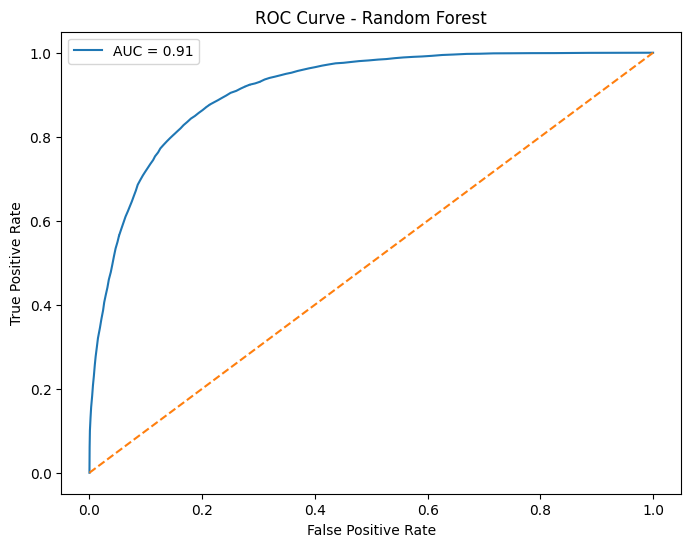

In [114]:
#Plot ROC Curve
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")

plt.plot([0,1], [0,1], linestyle="--")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()

plt.show()

In [115]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

def evaluate_model(y_true, y_pred):
    return [
        accuracy_score(y_true, y_pred),
        precision_score(y_true, y_pred),
        recall_score(y_true, y_pred),
        f1_score(y_true, y_pred)
    ]

results_clf = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest", "KNN"],
    "Accuracy": [
        *evaluate_model(yc_test, yc_pred_log)[0:1],
        *evaluate_model(yc_test, yc_pred_dt)[0:1],
        *evaluate_model(yc_test, yc_pred_rf_bal)[0:1],
        *evaluate_model(yc_test, yc_pred_knn)[0:1],
    ],
    "Precision": [
        evaluate_model(yc_test, yc_pred_log)[1],
        evaluate_model(yc_test, yc_pred_dt)[1],
        evaluate_model(yc_test, yc_pred_rf_bal)[1],
        evaluate_model(yc_test, yc_pred_knn)[1],
    ],
    "Recall": [
        evaluate_model(yc_test, yc_pred_log)[2],
        evaluate_model(yc_test, yc_pred_dt)[2],
        evaluate_model(yc_test, yc_pred_rf_bal)[2],
        evaluate_model(yc_test, yc_pred_knn)[2],
    ],
    "F1 Score": [
        evaluate_model(yc_test, yc_pred_log)[3],
        evaluate_model(yc_test, yc_pred_dt)[3],
        evaluate_model(yc_test, yc_pred_rf_bal)[3],
        evaluate_model(yc_test, yc_pred_knn)[3],
    ]
})

results_clf

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.701735,0.778378,0.563032,0.653419
1,Decision Tree,0.827891,0.829723,0.824572,0.827139
2,Random Forest,0.830842,0.827514,0.835386,0.831432
3,KNN,0.684784,0.694682,0.657955,0.675820


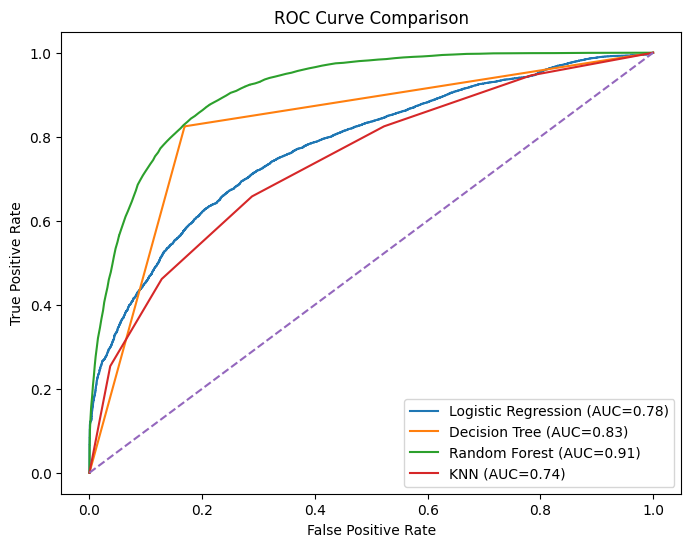

In [116]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

models = {
    "Logistic Regression": log_reg.predict_proba(Xc_test_scaled)[:,1],
    "Decision Tree": dt_clf.predict_proba(Xc_test)[:,1],
    "Random Forest": rf_clf_balanced.predict_proba(Xc_test)[:,1],
    "KNN": knn_clf.predict_proba(Xc_test_scaled)[:,1]
}

plt.figure(figsize=(8,6))

for name, probs in models.items():
    fpr, tpr, _ = roc_curve(yc_test, probs)
    auc = roc_auc_score(yc_test, probs)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.2f})")

plt.plot([0,1],[0,1],'--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

## Clustering

Creating Customer Dataset

In [117]:
#Will summarize cust behaviour
customer_df = df_main.groupby("customer_unique_id").agg({
    "payment_value": ["mean", "sum", "count"],
    "freight_value": "mean",
    "delivery_days": "mean",
    "review_score": "mean"
}).reset_index()

In [118]:
customer_df.head()

customer_unique_id payment_value               freight_value  \
                                             mean     sum count          mean   
0  0000366f3b9a7992bf8c76cfdf3221e2        141.90  141.90     1         12.00   
1  0000b849f77a49e4a4ce2b2a4ca5be3f         27.19   27.19     1          8.29   
2  0000f46a3911fa3c0805444483337064         86.22   86.22     1         17.22   
3  0000f6ccb0745a6a4b88665a16c9f078         43.62   43.62     1         17.63   
4  0004aac84e0df4da2b147fca70cf8255        196.89  196.89     1         16.89   

  delivery_days review_score  
           mean         mean  
0           6.0          5.0  
1           3.0          4.0  
2          25.0          3.0  
3          20.0          4.0  
4          13.0          5.0

In [119]:
#Flatten MultiIndex columns
customer_df.columns = [
    "customer_id",
    "avg_payment",
    "total_payment",
    "order_count",
    "avg_freight",
    "avg_delivery_days",
    "avg_review_score"
]

In [120]:
#Cluster must use behavioral features, so dropping customer_id
X_cluster = customer_df.drop("customer_id", axis=1)

In [121]:
X_cluster.head()

,avg_payment,total_payment,order_count,avg_freight,avg_delivery_days,avg_review_score
0,141.90,141.90,1,12.00,6.0,5.0
1,27.19,27.19,1,8.29,3.0,4.0
2,86.22,86.22,1,17.22,25.0,3.0
3,43.62,43.62,1,17.63,20.0,4.0
4,196.89,196.89,1,16.89,13.0,5.0


In [122]:
X_cluster.describe()

,avg_payment,total_payment,order_count,avg_freight,avg_delivery_days,avg_review_score
count,96096.000000,96096.000000,96096.000000,96096.000000,96096.000000,96096.000000
mean,161.407230,167.348547,1.040543,22.775357,11.716942,4.053735
std,222.316472,232.881415,0.255275,21.475940,9.664143,1.382358
min,0.000000,0.000000,1.000000,0.000000,-1.000000,0.000000
25%,62.447500,63.160000,1.000000,13.930000,6.000000,4.000000
50%,105.820000,108.155000,1.000000,17.170000,10.000000,5.000000
75%,177.212500,184.072500,1.000000,23.990000,15.000000,5.000000
max,13664.080000,13664.080000,17.000000,1794.960000,209.000000,5.000000


In [123]:
#Normalize features for clustering
from sklearn.preprocessing import StandardScaler

scaler_cluster = StandardScaler()

X_scaled = scaler_cluster.fit_transform(X_cluster)

In [124]:
#Convert back to DataFrame for Visualization 
import pandas as pd

X_scaled = pd.DataFrame(
    X_scaled,
    columns=X_cluster.columns
)

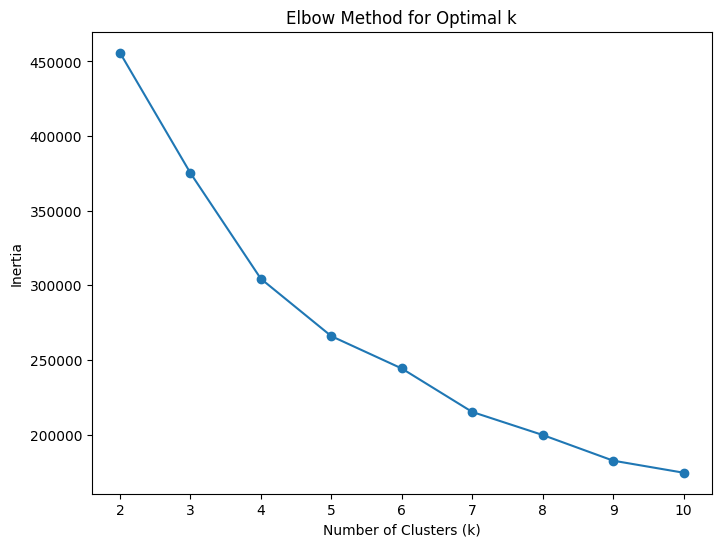

In [125]:
#Elbow Method to find optimal k
from sklearn.cluster import KMeans
inertia = []
K_range = range(2,11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(8,6))
plt.plot(K_range, inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

In [126]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8,6))
plt.plot(K_range, silhouette_scores, marker='o')

plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis")

plt.show()

KeyboardInterrupt: 

## Train KMeans Model

In [128]:
from sklearn.cluster import KMeans

k_optimal = 4

kmeans_final = KMeans(
    n_clusters=k_optimal,
    random_state=42
)

customer_clusters = kmeans_final.fit_predict(X_scaled)
customer_df["cluster"] = customer_clusters

In [129]:
customer_df["cluster"].value_counts()

cluster
0    72410
1    17674
3     3028
2     2984
Name: count, dtype: int64

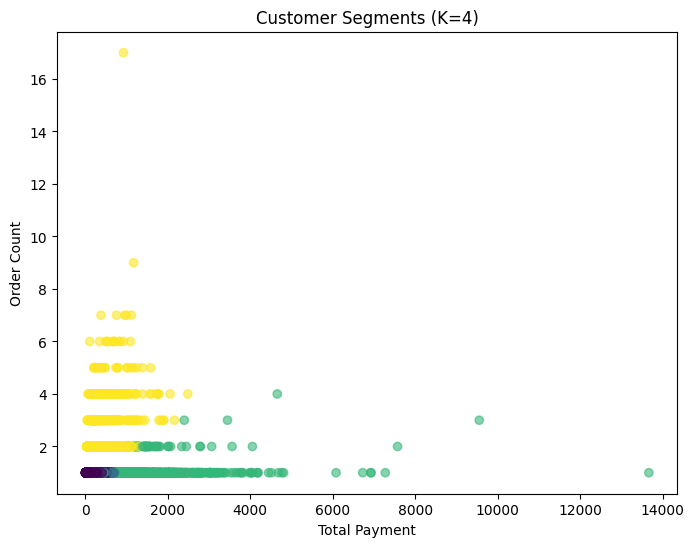

In [130]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

plt.scatter(
    customer_df["total_payment"],
    customer_df["order_count"],
    c=customer_df["cluster"],
    cmap="viridis",
    alpha=0.6
)

plt.xlabel("Total Payment")
plt.ylabel("Order Count")
plt.title("Customer Segments (K=4)")

plt.show()

In [131]:
customer_df.dtypes

customer_id           object
avg_payment          float64
total_payment        float64
order_count            int64
avg_freight          float64
avg_delivery_days    float64
avg_review_score     float64
cluster                int32
dtype: object

In [132]:
cluster_profile = customer_df.groupby("cluster").mean(numeric_only=True)
cluster_profile

,avg_payment,total_payment,order_count,avg_freight,avg_delivery_days,avg_review_score
cluster,,,,,,
0,128.506020,128.506020,1.000000,19.988817,10.069769,4.657326
1,150.241425,150.241425,1.000000,24.712953,18.185866,1.607785
2,1054.045695,1073.478123,1.019437,79.943477,13.731066,3.867292
3,133.695151,303.097563,2.267503,21.764325,11.363512,4.080155


In [133]:
customer_df["order_count"].value_counts().head(10)

order_count
1     93015
2      2515
3       399
4       124
5        23
6        13
7         5
9         1
17        1
Name: count, dtype: int64

## Visualize

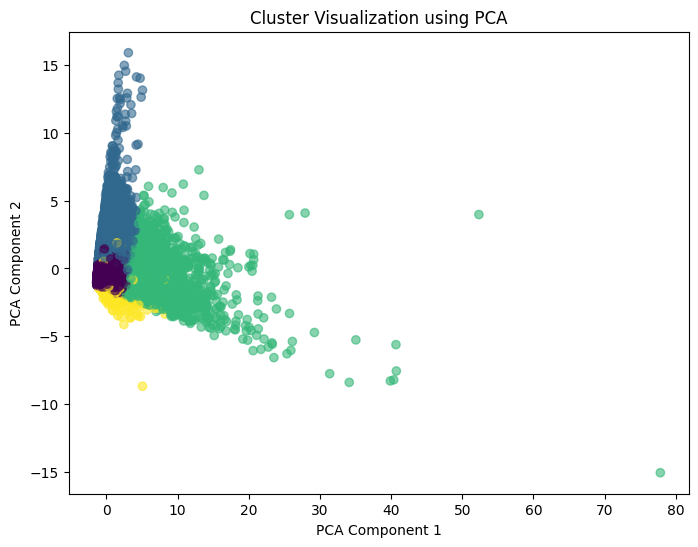

In [134]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))

plt.scatter(
    X_pca[:,0],
    X_pca[:,1],
    c=customer_df["cluster"],
    cmap="viridis",
    alpha=0.6
)

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Cluster Visualization using PCA")

plt.show()

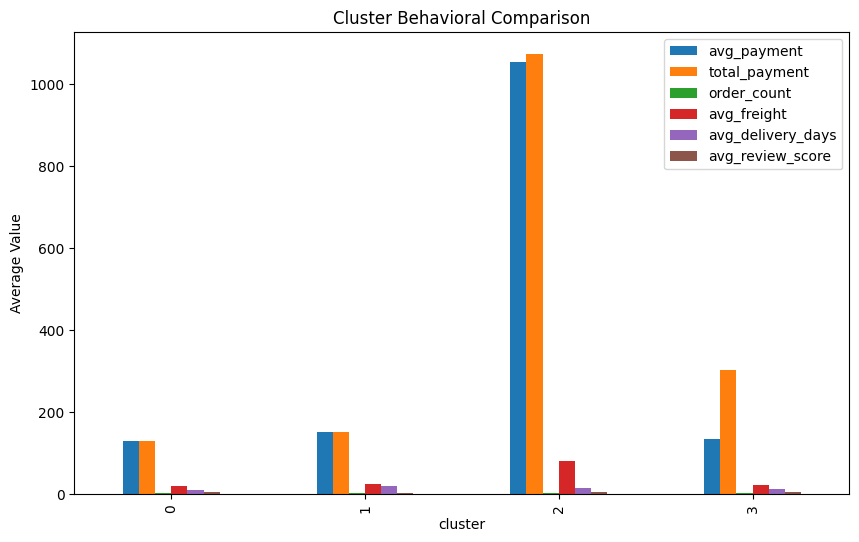

In [135]:
cluster_profile.plot(
    kind="bar",
    figsize=(10,6),
    title="Cluster Behavioral Comparison"
)

plt.ylabel("Average Value")
plt.show()

## NLP

In [136]:
#Taking reviwe col
reviews_df = df_main[["review_comment_message", "review_score"]].copy()

In [137]:
#Handle missing reviews
reviews_df["review_comment_message"] = reviews_df["review_comment_message"].fillna("")


In [138]:
reviews_df["review_comment_message"].sample(5)

15887                                                     
34185    Atrasou mas chegou certinho. E o produto é de ...
58276                                                     
29473                                                     
56041    Acho que vcs tinha que manda o que ta no anunç...
Name: review_comment_message, dtype: object

## Text Cleaning

In [139]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize



In [140]:
nltk.download("punkt")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to /home/anurag-
[nltk_data]     mandlekar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/anurag-
[nltk_data]     mandlekar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [141]:
stop_words = set(stopwords.words("portuguese"))

In [142]:
def clean_text(text):

    # 1. Lowercase
    text = text.lower()

    # 2. Remove punctuation and numbers
    text = re.sub(r"[^a-zA-Zà-úÀ-Ú\s]", " ", text)

    # 3. Tokenization
    tokens = word_tokenize(text)

    # 4. Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]

    # Join words back
    return " ".join(tokens)

In [143]:
#Apply cleaning function to reviews
reviews_df["cleaned_review"] = reviews_df["review_comment_message"].apply(clean_text)

In [144]:
reviews_df[
    ["review_comment_message", "cleaned_review"]
].sample(5)

,review_comment_message,cleaned_review
34149,"Achei um absurdo cobrar 20,00 de frente e eu t...",achei absurdo cobrar frente ter ir buscar prod...
64488,,
59611,,
90800,,
44832,,


## TF-IDF

In [145]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(
    max_features=3000,              #tops 3000 most informative words
    min_df=5,                       #only include words that appear in at least 5 reviews
    max_df=0.8                      #ignore words that appear in more than 80% of reviews
)

X_tfidf = tfidf.fit_transform(
    reviews_df["cleaned_review"]
)

In [146]:
X_tfidf.shape

(99992, 3000)

In [147]:
feature_names = tfidf.get_feature_names_out()

feature_names[:20]

array(['abaixo', 'abençoe', 'aberta', 'aberto', 'abraço', 'abraços',
       'abre', 'abri', 'abril', 'abrindo', 'abrir', 'abriu', 'absurdo',
       'acaba', 'acabada', 'acabado', 'acabamento', 'acabamentos',
       'acabar', 'acabaram'], dtype=object)

## Sentiment Labels

In [148]:
def get_sentiment(score):

    if score <= 2:
        return "Negative"
    elif score == 3:
        return "Neutral"
    else:
        return "Positive"


reviews_df["sentiment"] = reviews_df["review_score"].apply(get_sentiment)

In [149]:
reviews_df["sentiment"].value_counts()

sentiment
Positive    76470
Negative    15343
Neutral      8179
Name: count, dtype: int64

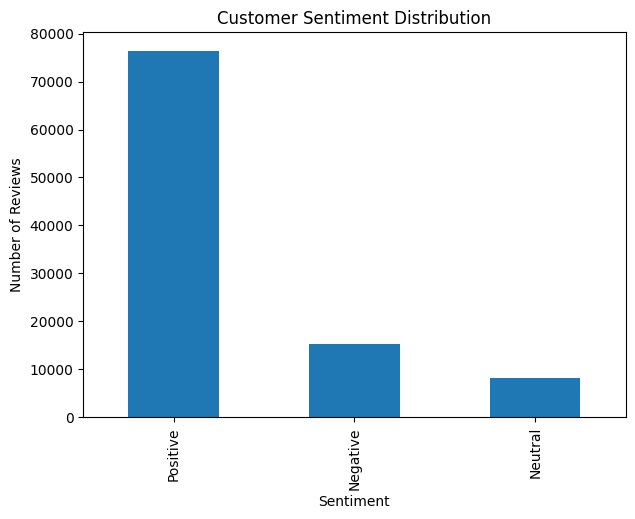

In [150]:
import matplotlib.pyplot as plt

sentiment_counts = reviews_df["sentiment"].value_counts()

plt.figure(figsize=(7,5))

sentiment_counts.plot(
    kind="bar"
)

plt.title("Customer Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")

plt.show()

In [151]:
#Extracting Keywords for each sentiment
feature_names = tfidf.get_feature_names_out()

In [152]:
import numpy as np

word_scores = np.asarray(X_tfidf.mean(axis=0)).ravel()

keywords_df = (
    pd.DataFrame({
        "word": feature_names,
        "importance": word_scores
    })
    .sort_values(by="importance", ascending=False)
)

In [153]:
keywords_df.head(20)

,word,importance
2248,produto,0.037734
350,bom,0.023293
2178,prazo,0.022971
1057,entrega,0.017903
161,antes,0.016983
2413,recomendo,0.016714
511,chegou,0.015833
2389,recebi,0.014280
1070,entregue,0.011986
2992,ótimo,0.009534


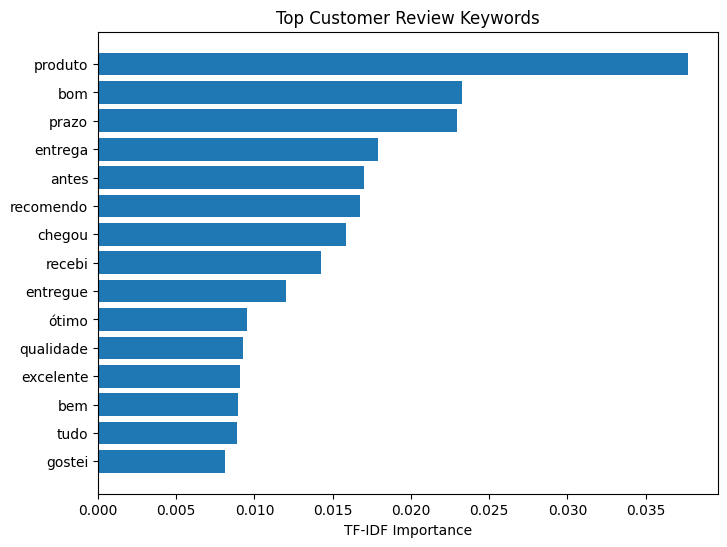

In [154]:
top_words = keywords_df.head(15)

plt.figure(figsize=(8,6))

plt.barh(top_words["word"], top_words["importance"])
plt.gca().invert_yaxis()

plt.title("Top Customer Review Keywords")
plt.xlabel("TF-IDF Importance")

plt.show()

In [155]:
positive_reviews = reviews_df[
    reviews_df["sentiment"] == "Positive"
]["cleaned_review"]

negative_reviews = reviews_df[
    reviews_df["sentiment"] == "Negative"
]["cleaned_review"]

In [156]:
tfidf_pos = TfidfVectorizer(max_features=2000)
X_pos = tfidf_pos.fit_transform(positive_reviews)

tfidf_neg = TfidfVectorizer(max_features=2000)
X_neg = tfidf_neg.fit_transform(negative_reviews)

In [157]:
#Extract positive keywords
pos_words = tfidf_pos.get_feature_names_out()
pos_scores = np.asarray(X_pos.mean(axis=0)).ravel()

positive_keywords = (
    pd.DataFrame({
        "word": pos_words,
        "importance": pos_scores
    })
    .sort_values(by="importance", ascending=False)
)

#Extract negative keywords
neg_words = tfidf_neg.get_feature_names_out()
neg_scores = np.asarray(X_neg.mean(axis=0)).ravel()

negative_keywords = (
    pd.DataFrame({
        "word": neg_words,
        "importance": neg_scores
    })
    .sort_values(by="importance", ascending=False)
)

In [158]:
positive_keywords.head(15)

,word,importance
1487,produto,0.034492
250,bom,0.026633
1441,prazo,0.025511
134,antes,0.020173
1608,recomendo,0.019675
714,entrega,0.018489
356,chegou,0.016242
1993,ótimo,0.011831
797,excelente,0.011313
725,entregue,0.010535


In [159]:
negative_keywords.head(15)

,word,importance
1498,produto,0.064343
1583,recebi,0.048747
53,ainda,0.027466
695,entregue,0.023364
387,comprei,0.023329
685,entrega,0.021106
1920,veio,0.020961
318,chegou,0.020056
1206,nao,0.017884
1461,prazo,0.014903


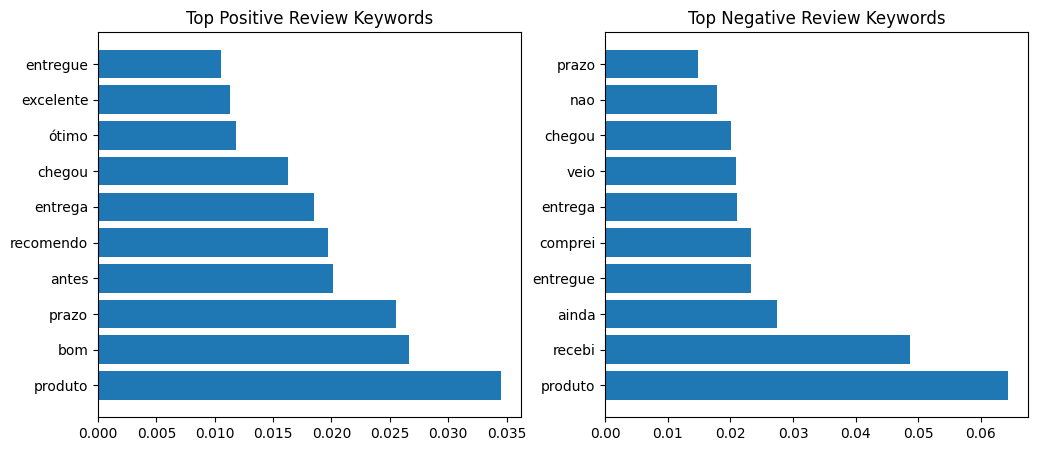

In [160]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.barh(
    positive_keywords.head(10)["word"],
    positive_keywords.head(10)["importance"]
)
plt.title("Top Positive Review Keywords")

plt.subplot(1,2,2)
plt.barh(
    negative_keywords.head(10)["word"],
    negative_keywords.head(10)["importance"]
)
plt.title("Top Negative Review Keywords")

plt.show()

## Converting NLP to Classifier 

In [161]:
#Target variable for classification
y_nlp = reviews_df["sentiment"]

In [162]:
#train-test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf,
    y_nlp,
    test_size=0.2,
    random_state=42
)

In [163]:
from sklearn.linear_model import LogisticRegression

nlp_model = LogisticRegression(max_iter=1000)

nlp_model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [164]:
#Predict sentiment
y_pred = nlp_model.predict(X_test)

In [165]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix
)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.840642032101605
Precision: 0.7930737853988205
Recall: 0.840642032101605
F1 Score: 0.802820320798003


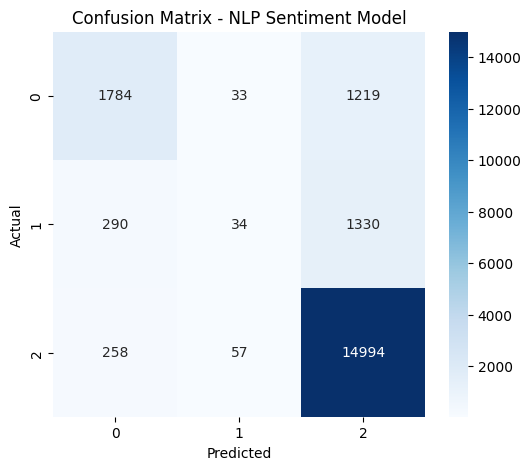

In [166]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

plt.title("Confusion Matrix - NLP Sentiment Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.show()

## Continue Time Series

In [173]:
#Creating time-series dataset
df_main["order_purchase_timestamp"] = pd.to_datetime(
    df_main["order_purchase_timestamp"]
)

In [210]:
#Setting dataframe index
df_ts = df_main.set_index("order_purchase_timestamp")
monthly_sales = df_ts["payment_value"].resample("M").sum()          #Grouping months
monthly_sales = monthly_sales.iloc[:-10]

/tmp/ipykernel_8219/1754226156.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df_ts["payment_value"].resample("M").sum()          #Grouping months


In [211]:
monthly_sales.head()

order_purchase_timestamp
2016-09-30       357.52
2016-10-31     59271.30
2016-11-30         0.00
2016-12-31        19.62
2017-01-31    139459.77
Freq: ME, Name: payment_value, dtype: float64

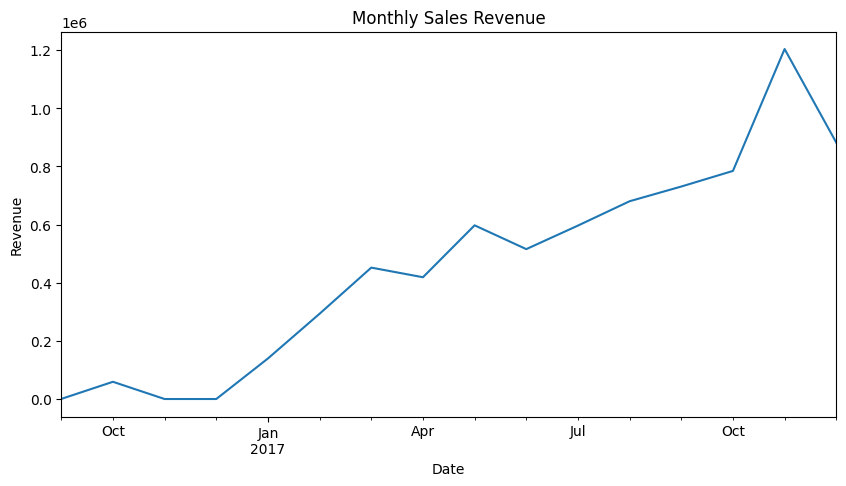

In [212]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
monthly_sales.plot()

plt.title("Monthly Sales Revenue")
plt.xlabel("Date")
plt.ylabel("Revenue")

plt.show()

In [233]:
#Check Stationarity with Augmented Dickey-Fuller Test(ADF)

# !pip install statsmodels
from statsmodels.tsa.stattools import adfuller

result = adfuller(monthly_sales)

print("ADF Statistic:", result[0])
print("p-value:", result[1])           

ADF Statistic: 2.464507350518999
p-value: 0.9990375036637177


Applying Differencing to make stationary

In [234]:
monthly_sales_diff = monthly_sales.diff()

In [237]:
#Removing Nans created by differencing
monthly_sales_diff = monthly_sales_diff.dropna()

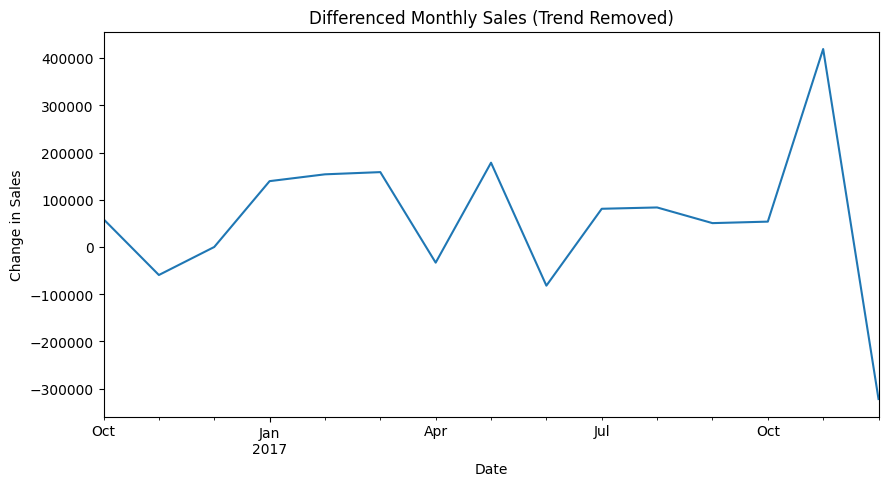

In [238]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
monthly_sales_diff.plot()

plt.title("Differenced Monthly Sales (Trend Removed)")
plt.xlabel("Date")
plt.ylabel("Change in Sales")

plt.show()

In [239]:
from statsmodels.tsa.stattools import adfuller

result_diff = adfuller(monthly_sales_diff)

print("ADF Statistic:", result_diff[0])
print("p-value:", result_diff[1])

ADF Statistic: -3.257836968764855
p-value: 0.016871624698684296


## Import Plot Functions

<Figure size 1200x500 with 0 Axes>

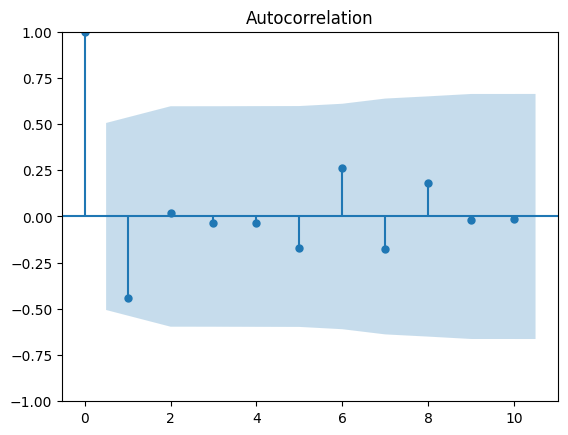

In [219]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.figure(figsize=(12,5))
plot_acf(monthly_sales_diff, lags=10)
plt.show()




<Figure size 1200x500 with 0 Axes>

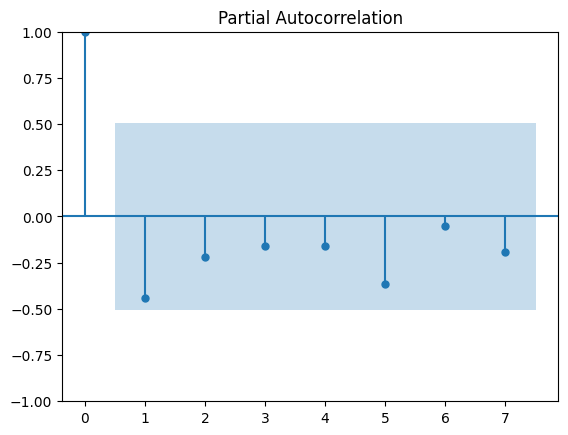

In [228]:
plt.figure(figsize=(12,5))
plot_pacf(monthly_sales_diff, lags=7)
plt.show()


## Arima


In [221]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(monthly_sales, order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())  

                               SARIMAX Results                                
Dep. Variable:          payment_value   No. Observations:                   16
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -201.083
Date:                Wed, 25 Feb 2026   AIC                            408.166
Time:                        14:49:36   BIC                            410.291
Sample:                    09-30-2016   HQIC                           408.144
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9115      0.629     -1.449      0.147      -2.145       0.322
ma.L1          0.6596      0.720      0.916      0.360      -0.751       2.071
sigma2      3.308e+10    5.5e-11   6.01e+20      0.0

In [222]:
# Forest Future Scales
forecast = model_fit.forecast(steps=12)
forecast

2018-01-31    1.033719e+06
2018-02-28    8.951530e+05
2018-03-31    1.021450e+06
2018-04-30    9.063353e+05
2018-05-31    1.011258e+06
2018-06-30    9.156250e+05
2018-07-31    1.002791e+06
2018-08-31    9.233426e+05
2018-09-30    9.957566e+05
2018-10-31    9.297541e+05
2018-11-30    9.899128e+05
2018-12-31    9.350805e+05
Freq: ME, Name: predicted_mean, dtype: float64

## Plotting Forecast vs Historical Data

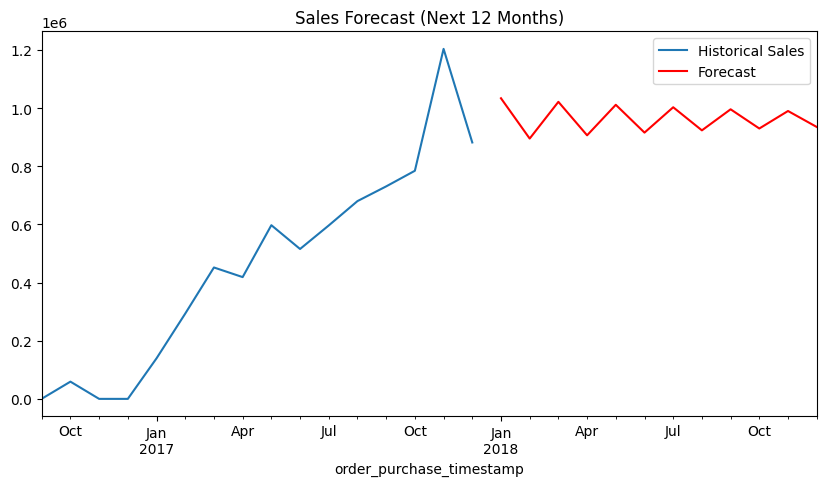

In [223]:
plt.figure(figsize=(10,5))

monthly_sales.plot(label="Historical Sales")
forecast.plot(label="Forecast", color="red")

plt.title("Sales Forecast (Next 12 Months)")
plt.legend()

plt.show()

In [224]:
# Split data into train and test
train = monthly_sales[:-6]
test = monthly_sales[-6:]

In [225]:
# Train ARIMA on train data
model = ARIMA(train, order=(1,1,1))
model_fit = model.fit()

In [226]:
forecast_test = model_fit.forecast(steps=len(test))

In [227]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(test, forecast_test)
rmse = np.sqrt(mean_squared_error(test, forecast_test))

print("MAE:", mae)
print("RMSE:", rmse)

MAE: 265782.0198737827
RMSE: 325196.3785510919


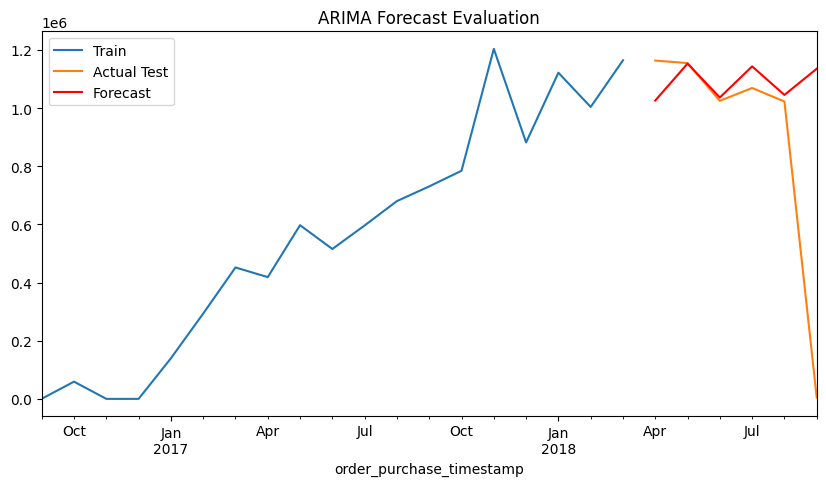

In [205]:
plt.figure(figsize=(10,5))

train.plot(label="Train")
test.plot(label="Actual Test")
forecast_test.plot(label="Forecast", color="red")

plt.title("ARIMA Forecast Evaluation")
plt.legend()

plt.show()